In [1]:
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\alokk\Downloads\phishing-website-detection-main\Notebook\Raw_data\Dataset Phising Website.csv")

In [3]:
df.head()

,index,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,2,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,3,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,4,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
# 1. Drop useless index column
df.drop(columns=["index"], inplace=True)

In [5]:
# 2. Remove duplicate rows
df = df.drop_duplicates()

In [6]:
# 3. Check missing values
print("Total missing values :", df.isnull().sum().sum())

Total missing values : 0


In [7]:
print("Final shape :", df.shape)

Final shape : (5849, 31)


In [8]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [9]:
df.info() # give all Datatype 

<class 'pandas.DataFrame'>
Index: 5849 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int64
 14  Links_i

 2. Separate features and target

In [10]:
X = df.drop("Result", axis=1)
y = df["Result"]

print(X.shape, y.shape)


(5849, 30) (5849,)


3. Graph – Class Distribution

Why this graph is important?

It tells you whether your dataset is:
balanced
or biased toward one class

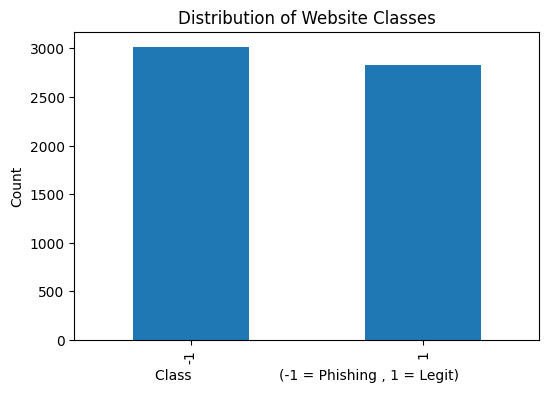

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df["Result"].value_counts().sort_index().plot(kind="bar")

plt.xlabel("Class                    (-1 = Phishing , 1 = Legit)")
plt.ylabel("Count")
plt.title("Distribution of Website Classes")

plt.show()


In [12]:
corr = df.corr()["Result"].sort_values()

print(corr)


Domain_registeration_length   -0.218623
Abnormal_URL                  -0.090043
Shortining_Service            -0.076166
HTTPS_token                   -0.051412
Redirect                      -0.037462
double_slash_redirecting      -0.036693
Favicon                       -0.025457
popUpWidnow                   -0.022455
Iframe                        -0.011756
Submitting_to_email           -0.008014
RightClick                     0.009286
on_mouseover                   0.012790
port                           0.014201
DNSRecord                      0.033204
having_At_Symbol               0.034757
Page_Rank                      0.048140
URL_Length                     0.058228
age_of_domain                  0.062800
Links_pointing_to_page         0.068463
having_IP_Address              0.104952
Statistical_report             0.108486
Google_Index                   0.118217
Request_URL                    0.237778
Links_in_tags                  0.243864
SFH                            0.281131


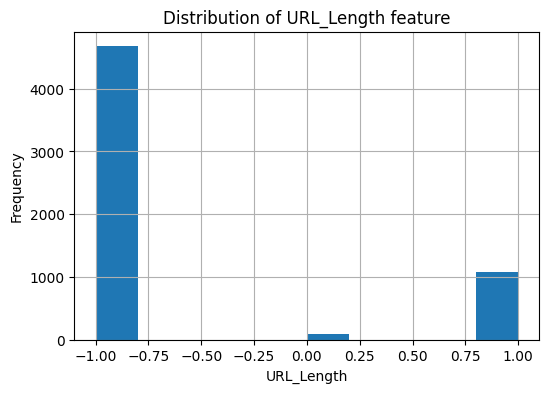

In [13]:
plt.figure(figsize=(6,4))

df["URL_Length"].hist()

plt.xlabel("URL_Length")
plt.ylabel("Frequency")
plt.title("Distribution of URL_Length feature")

plt.show()


4. Select the necessary Features


In [14]:
corr_with_target = df.corr()["Result"].drop("Result")
print(corr_with_target)

having_IP_Address              0.104952
URL_Length                     0.058228
Shortining_Service            -0.076166
having_At_Symbol               0.034757
double_slash_redirecting      -0.036693
Prefix_Suffix                  0.381134
having_Sub_Domain              0.296214
SSLfinal_State                 0.693228
Domain_registeration_length   -0.218623
Favicon                       -0.025457
port                           0.014201
HTTPS_token                   -0.051412
Request_URL                    0.237778
URL_of_Anchor                  0.679125
Links_in_tags                  0.243864
SFH                            0.281131
Submitting_to_email           -0.008014
Abnormal_URL                  -0.090043
Redirect                      -0.037462
on_mouseover                   0.012790
RightClick                     0.009286
popUpWidnow                   -0.022455
Iframe                        -0.011756
age_of_domain                  0.062800
DNSRecord                      0.033204


In [15]:
# (correlation >= 0.10)
selected_features = corr_with_target[abs(corr_with_target) >= 0.10].index.tolist()

In [16]:
# Reduced dataset
selected_df = df[selected_features + ["Result"]]

In [17]:
# Correlation matrix
corr_matrix = selected_df.corr()

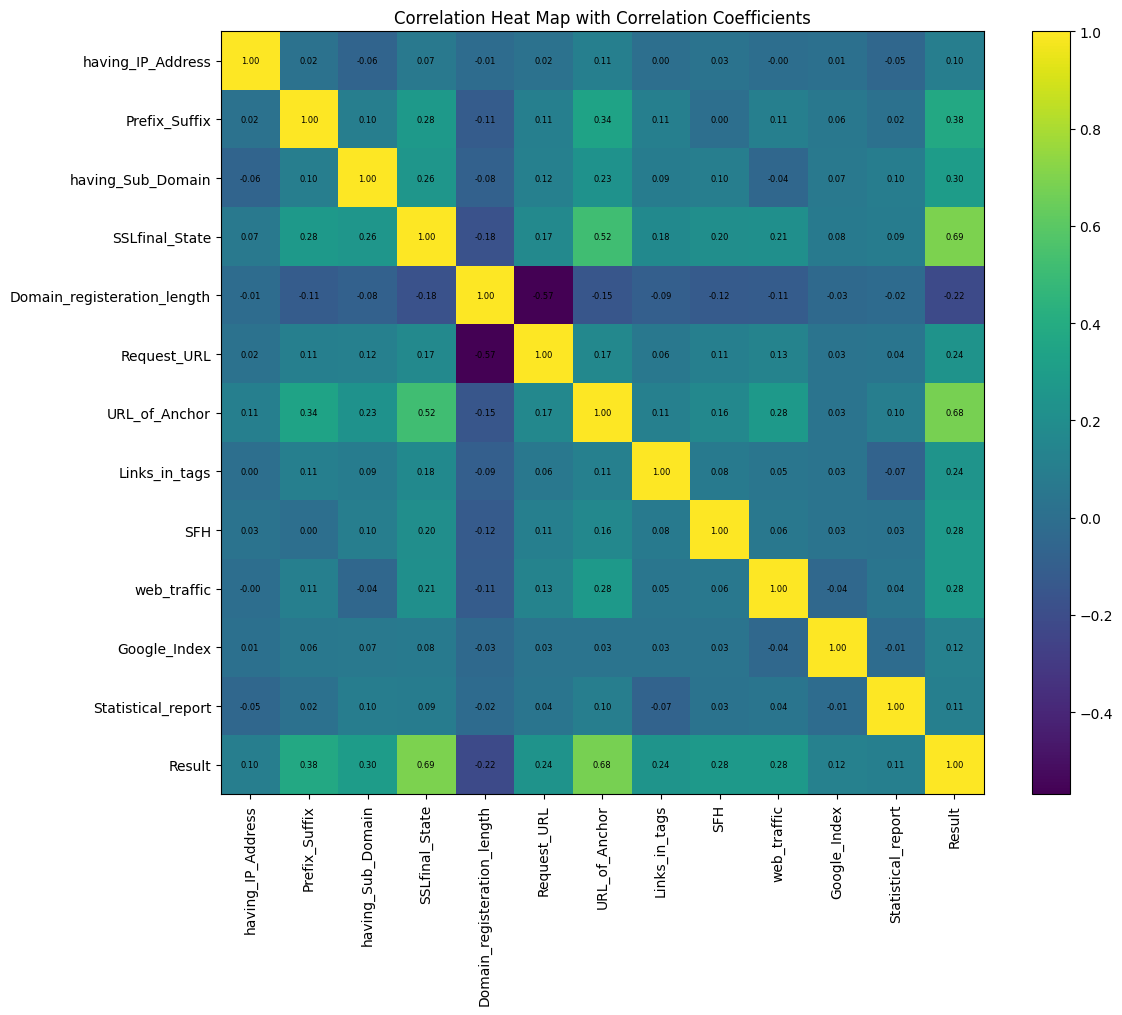

In [18]:
# create proper correlation matrix (DataFrame)
corr = selected_df.corr()     # or df.corr()

plt.figure(figsize=(12,10))
plt.imshow(corr)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)

plt.title("Correlation Heat Map with Correlation Coefficients")
plt.colorbar()

# write coefficients
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", fontsize=6)

plt.tight_layout()
plt.show()


5. Train–test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = selected_df.drop("Result", axis=1)
y = selected_df["Result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


Save the final dataset

In [22]:
selected_df.to_csv("final_phishing_dataset.csv", index=False)

In [23]:
df = pd.read_csv("final_phishing_dataset.csv")

In [24]:
df.head()

,having_IP_Address,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,SFH,web_traffic,Google_Index,Statistical_report,Result
0,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1
1,1,-1,0,1,-1,1,0,-1,-1,0,1,1,-1
2,1,-1,-1,-1,-1,1,0,-1,-1,1,1,-1,-1
3,1,-1,-1,-1,1,-1,0,0,-1,1,1,1,-1
4,1,-1,1,1,-1,1,0,0,-1,0,1,1,1


In [25]:
df.shape

(5849, 13)